In [3]:
for dirname, _, filenames in os.walk("."):
    for filename in filenames:
        print(os.path.join(dirname,filename))

.\car_details.csv
.\eda.ipynb
.\.ipynb_checkpoints\eda-checkpoint.ipynb
.\data\carvana.csv
.\data\gym_members_exercise_tracking_synthetic_data.csv


# Import Libraries needed for data analysis and visualization

In [4]:
import numpy as np #to deal with data
import pandas as pd #to deal with data
import matplotlib.pyplot as plt #to deal with graphic charts
import seaborn as sns #to deal with graphic charts

C:\Users\jane.waweru\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Read the car data into a pandas dataframe

In [5]:
df = pd.read_csv("car_details.csv")

In [6]:
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [7]:
# shape of the data -- rows and columns

df.shape

(4340, 8)

In [8]:
# Description of the data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4340.0,2013.090783,4.215344,1992.0,2011.00,2014.0,2016.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,35000.00,60000.0,90000.0,806599.0


In [9]:
# to know more more information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [10]:
#To get the column names 
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [11]:
#To get the column types  
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

# to know unique values

In [12]:
# to know unique values
print(f"\nUnique Car Names : {df.name.unique()}\n")
print(f"\nUnique Car Year : {sorted(df.year.unique())}\n")
print(f"\nUnique Car fuel : {df.fuel.unique()}\n")
print(f"\nUnique seller_type : {df.seller_type.unique()}\n")
print(f"\nUnique transmission : {df.transmission.unique()}\n")
print(f"\nUnique Car owner : {df.owner.unique()}\n")


Unique Car Names : ['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']


Unique Car Year : [1992, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


Unique Car fuel : ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


Unique seller_type : ['Individual' 'Dealer' 'Trustmark Dealer']


Unique transmission : ['Manual' 'Automatic']


Unique Car owner : ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']



# To find if there are null values or not

In [13]:
# find null values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

# To see if there are duplicate values

In [14]:
#find duplicate values
df.duplicated().sum()

763

In [15]:
# view duplicate values
df[df.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


# Analyzing the data

# 1. What is the most sold car

<function matplotlib.pyplot.show(close=None, block=None)>

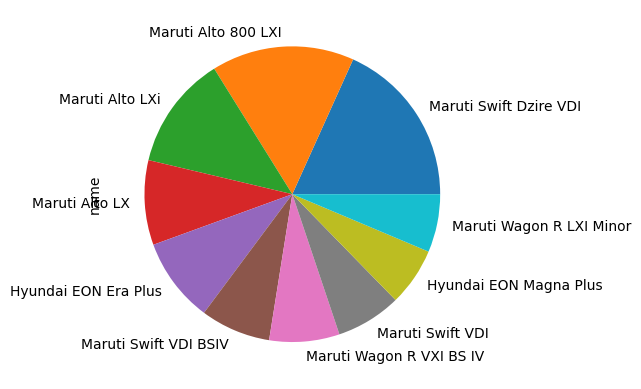

In [16]:
df["name"].value_counts(normalize = True)[:10].plot(kind='pie')
plt.show

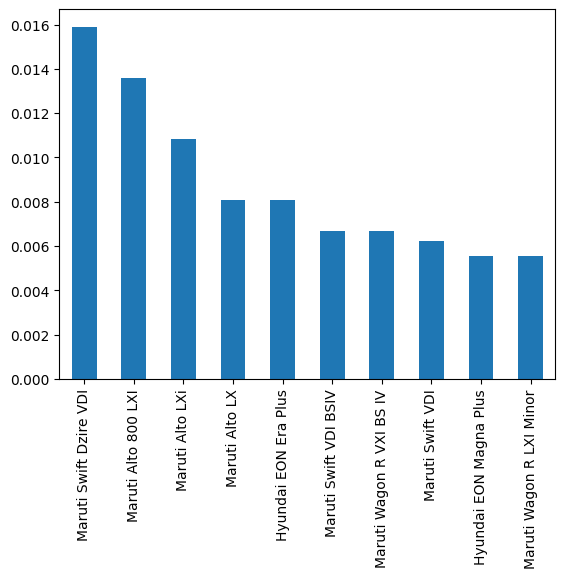

In [17]:
#we use (value_counts) to know to know the sold numbers of each car use (plot) to draw the graph
df["name"].value_counts(normalize = True)[:10].plot(kind = 'bar') 
plt.show() 

In [18]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

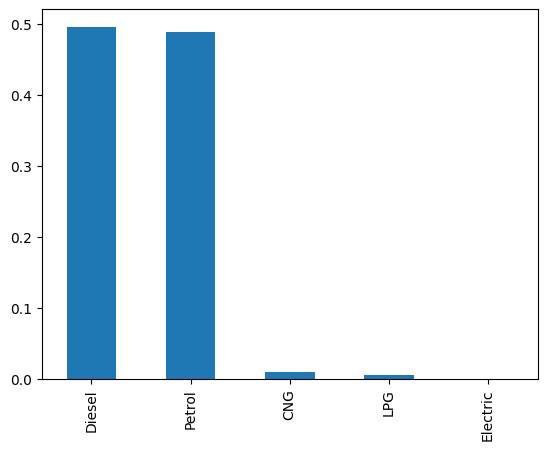

In [19]:
# fuel

df["fuel"].value_counts(normalize = True)[:10].plot(kind = 'bar') 
plt.show()

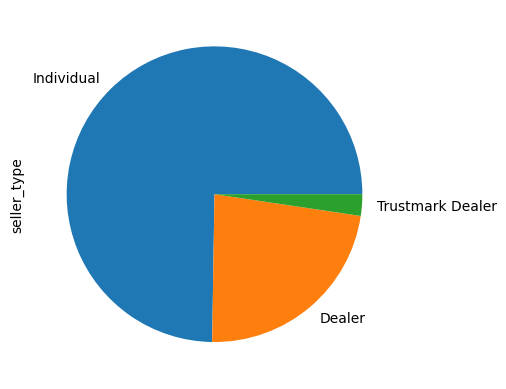

In [20]:
# seller_type

df["seller_type"].value_counts(normalize = True)[:10].plot(kind = 'pie') 
plt.show()

# Most popular sold Transmission Type

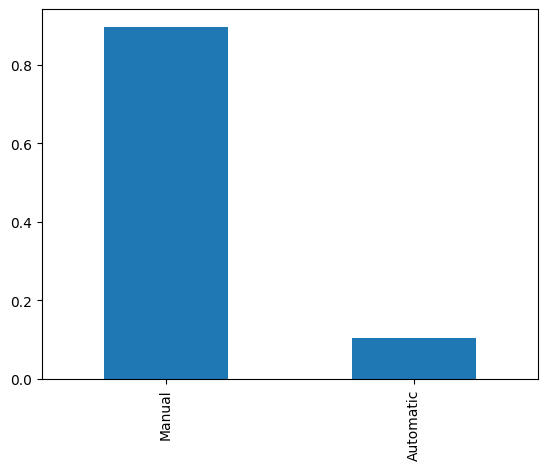

In [21]:
df["transmission"].value_counts(normalize = True)[:10].plot(kind = 'bar') 
plt.show() 

# Owner Type

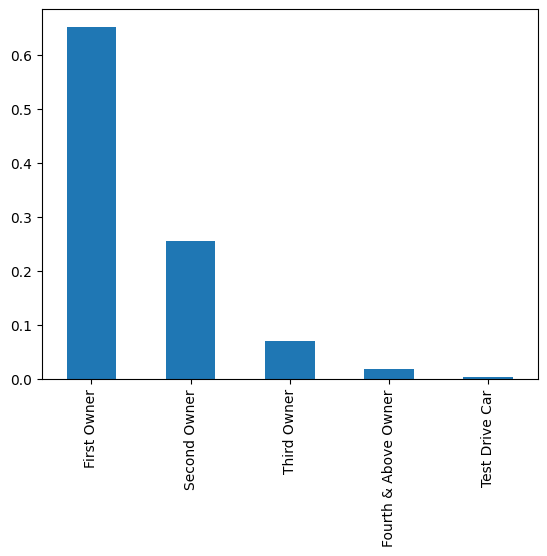

In [22]:
df["owner"].value_counts(normalize = True)[:10].plot(kind = 'bar') 
plt.show() 

# create a new column for car brand which will be the first word of each car name

In [23]:
df['name']

0                             Maruti 800 AC
1                  Maruti Wagon R LXI Minor
2                      Hyundai Verna 1.6 SX
3                    Datsun RediGO T Option
4                     Honda Amaze VX i-DTEC
                       ...                 
4335    Hyundai i20 Magna 1.4 CRDi (Diesel)
4336             Hyundai i20 Magna 1.4 CRDi
4337                    Maruti 800 AC BSIII
4338       Hyundai Creta 1.6 CRDi SX Option
4339                       Renault KWID RXT
Name: name, Length: 4340, dtype: object

In [24]:
df['name'].str.split(" ")

0                                [Maruti, 800, AC]
1                   [Maruti, Wagon, R, LXI, Minor]
2                        [Hyundai, Verna, 1.6, SX]
3                      [Datsun, RediGO, T, Option]
4                       [Honda, Amaze, VX, i-DTEC]
                           ...                    
4335    [Hyundai, i20, Magna, 1.4, CRDi, (Diesel)]
4336              [Hyundai, i20, Magna, 1.4, CRDi]
4337                      [Maruti, 800, AC, BSIII]
4338       [Hyundai, Creta, 1.6, CRDi, SX, Option]
4339                          [Renault, KWID, RXT]
Name: name, Length: 4340, dtype: object

In [25]:
#add new coulmn by brand name split first part  
df["brand"] = df.name.apply(lambda x : ' '.join(x.split(' ')[:1]))#Cuts first word only(car brand)from name column
df['brand'] # New column review

0        Maruti
1        Maruti
2       Hyundai
3        Datsun
4         Honda
         ...   
4335    Hyundai
4336    Hyundai
4337     Maruti
4338    Hyundai
4339    Renault
Name: brand, Length: 4340, dtype: object

In [26]:
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner,Maruti
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner,Hyundai
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner,Tata
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner,Hyundai
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner,Maruti


# See the difference below between name and brand counts

In [27]:
df.name.value_counts()

Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: name, Length: 1491, dtype: int64

In [28]:
#To know countnvalue in coulmn
df.brand.value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: brand, dtype: int64

# what is the average price per brand

In [29]:
price = df.groupby(['brand'])[['selling_price']].mean()
price

,selling_price
brand,
Ambassador,1.800000e+05
Audi,1.931633e+06
BMW,2.945385e+06
Chevrolet,2.367271e+05
Daewoo,6.000000e+04
Datsun,2.970269e+05
Fiat,2.834324e+05
Force,3.460000e+05
Ford,5.712731e+05


In [30]:
price.sort_values(by='selling_price', ascending=True, inplace=True)

In [31]:
price

,selling_price
brand,
Daewoo,6.000000e+04
OpelCorsa,8.850000e+04
Ambassador,1.800000e+05
Chevrolet,2.367271e+05
Fiat,2.834324e+05
Tata,2.840834e+05
Datsun,2.970269e+05
Maruti,3.424163e+05
Force,3.460000e+05


# Plot price per brand

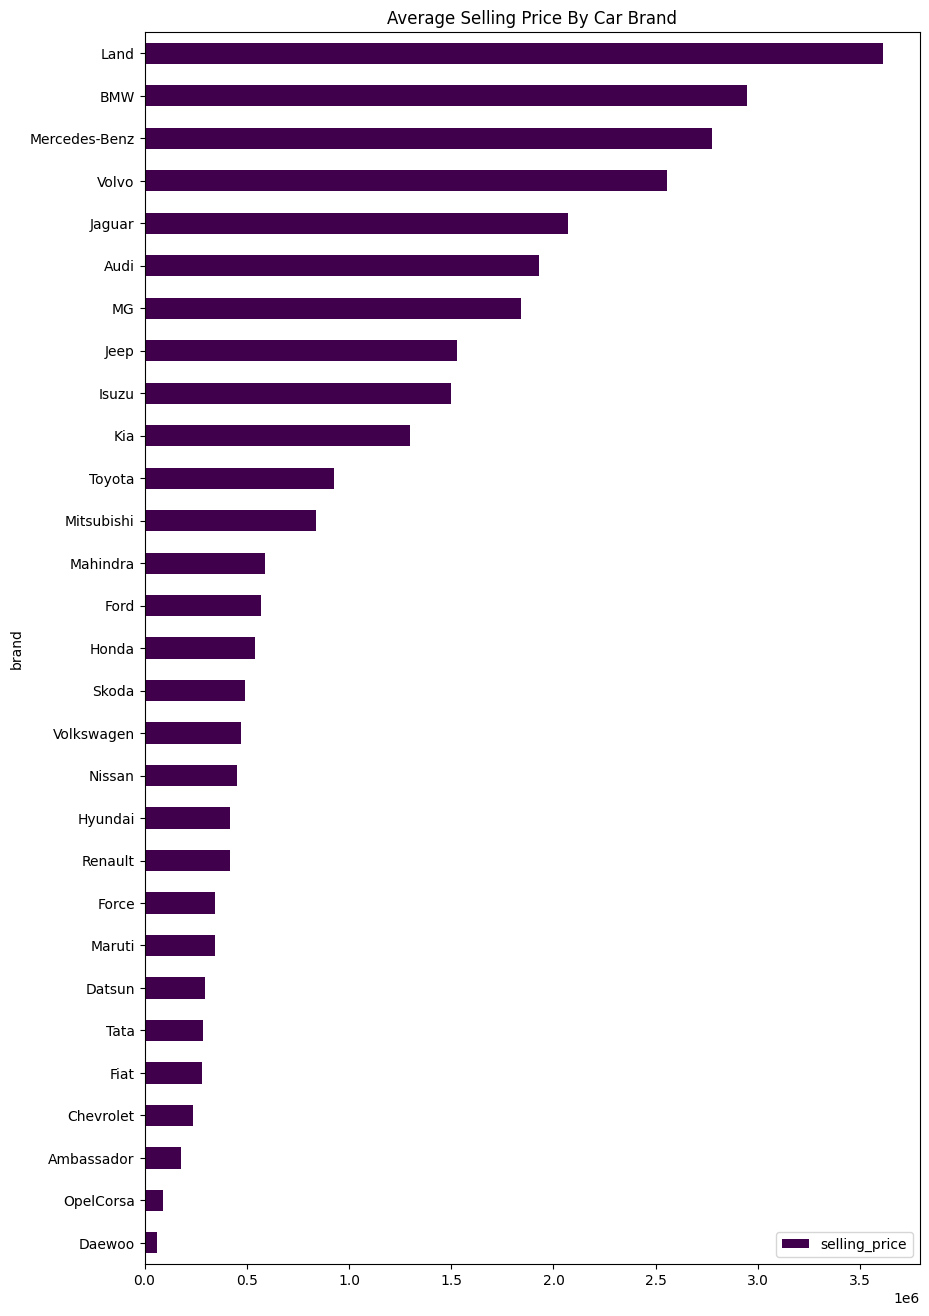

In [32]:
ax   = price.plot(kind='barh', cmap='PRGn' , figsize=(10,16) ,title= 'Average Selling Price By Car Brand')

# set the labels on the bar graph

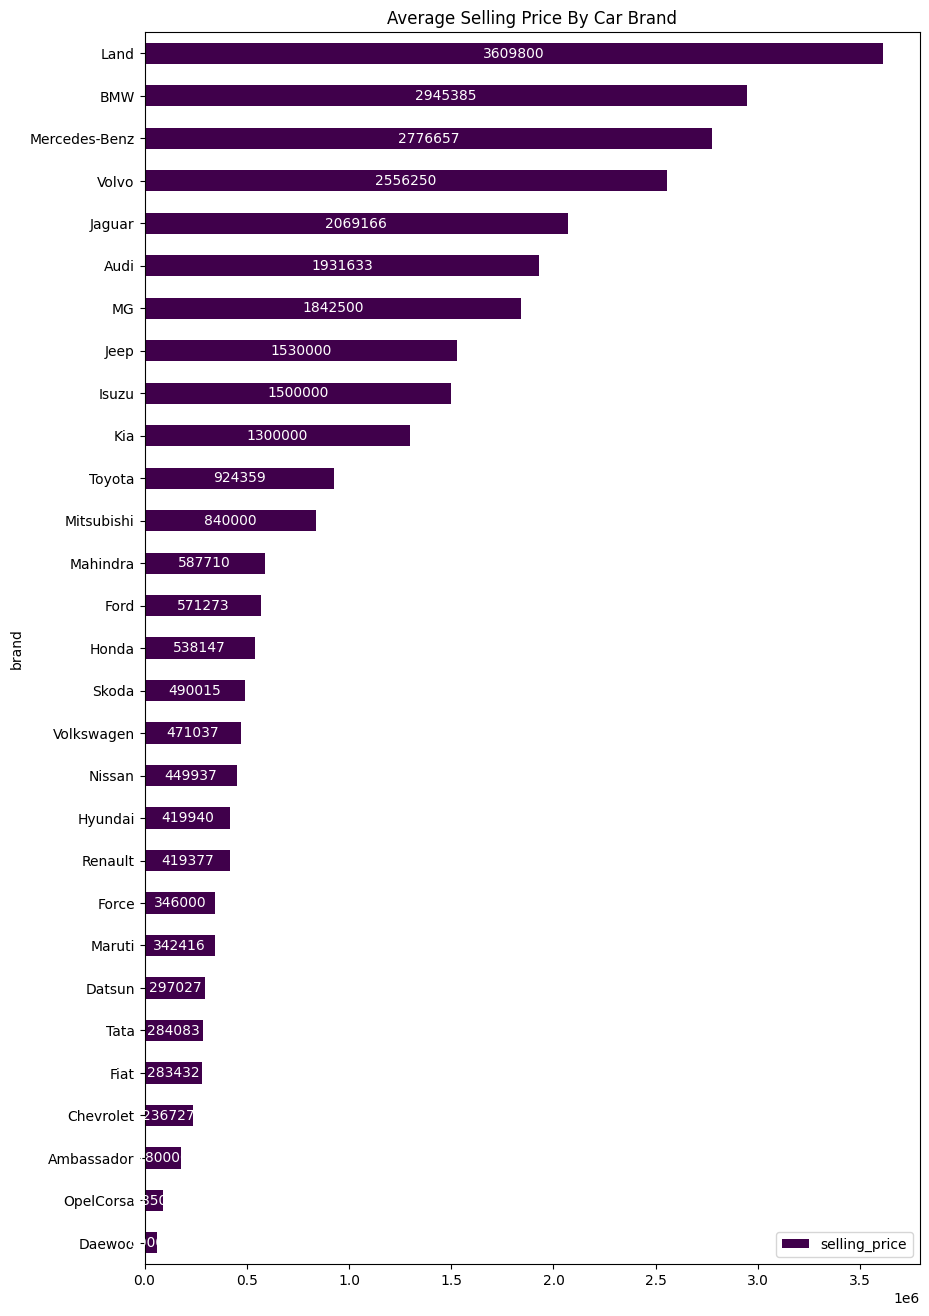

In [33]:
ax   = price.plot(kind='barh', cmap='PRGn' , figsize=(10,16) ,title= 'Average Selling Price By Car Brand')

for c in ax.containers:
        # set the bar label
    ax.bar_label(c, fmt='%.0f',label_type='center', color='w',rotation=0)

# Sales classified by Brand

In [34]:
# We will display sales by count and value in separate graphs

#plot 1:
data = df.groupby(['brand'])['brand'].count().sort_values(ascending=False) #to extract the count 
data

brand
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Mitsubishi          6
Jaguar              6
Land                5
Ambassador          4
Volvo               4
Jeep                3
OpelCorsa           2
MG                  2
Isuzu               1
Force               1
Daewoo              1
Kia                 1
Name: brand, dtype: int64

In [35]:
x = data.index # to extract the brand name
x

Index(['Maruti', 'Hyundai', 'Mahindra', 'Tata', 'Honda', 'Ford', 'Toyota',
       'Chevrolet', 'Renault', 'Volkswagen', 'Skoda', 'Nissan', 'Audi', 'BMW',
       'Fiat', 'Datsun', 'Mercedes-Benz', 'Mitsubishi', 'Jaguar', 'Land',
       'Ambassador', 'Volvo', 'Jeep', 'OpelCorsa', 'MG', 'Isuzu', 'Force',
       'Daewoo', 'Kia'],
      dtype='object', name='brand')

In [36]:
y = data.values # to extract the count to brand 
y

array([1280,  821,  365,  361,  252,  238,  206,  188,  146,  107,   68,
         64,   60,   39,   37,   37,   35,    6,    6,    5,    4,    4,
          3,    2,    2,    1,    1,    1,    1], dtype=int64)

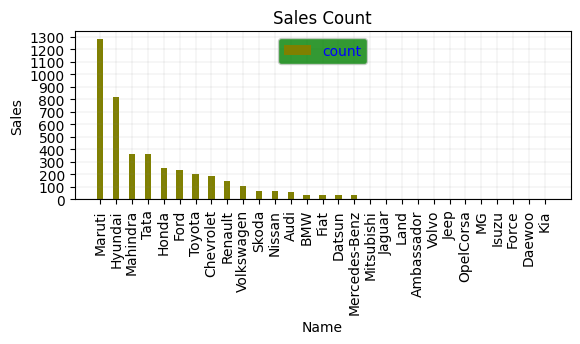

In [37]:
#plot 1:
data = df.groupby(['brand'])['brand'].count().sort_values(ascending=False) #to extract the count 
x = data.index # to extract the brand name
y = data.values # to extract the count to brand 
plt.subplot(2, 1, 1)#The location of the first graph 2 1 1 
#the figure has 2 row, 1 columns, and this plot is the first plot.
plt.bar(x, y, color ='olive',width = 0.4)#Fomat to plt.bar
plt.rcParams['axes.facecolor'] = '#FFFFFF'#background color
plt.xticks(rotation=90) #Make the text of the label Make the text of the label at  angle 90 
plt.xlabel("Name",fontsize=10,color="black")#Fomat and name to x
plt.ylabel("Sales",fontsize=10,color="black")#Fomat and name to y
plt.title("Sales Count",color="black")#Fomat and name to title
plt.legend(["count"], loc ="upper center" ,facecolor='green', labelcolor='Blue')#Fomat and name to legend
plt.rcParams['figure.figsize'] = [10, 10]#Determine the size of the graph
plt.grid(color='grey', linestyle='-', linewidth=.1)#Fomat grid network that appears in graph background 
#plt.xlim([0, 1]) #
#plt.ylim([0, 2000])#
#plt.locator_params(axis='x', nbins=20)#
plt.locator_params(axis='y', nbins=20)# to make y texts 100-200-300-- like that

In [38]:
data = df.groupby(['brand'])['selling_price'].sum().sort_values(ascending=False) 
data

brand
Maruti           438292858
Hyundai          344770954
Mahindra         214513983
Toyota           190417988
Ford             135962991
Honda            135612989
Audi             115898000
BMW              114870000
Tata             102554097
Mercedes-Benz     97183000
Renault           61228997
Volkswagen        50400996
Chevrolet         44504688
Skoda             33321000
Nissan            28795997
Land              18049000
Jaguar            12414999
Datsun            10989997
Fiat              10486999
Volvo             10225000
Mitsubishi         5040000
Jeep               4590000
MG                 3685000
Isuzu              1500000
Kia                1300000
Ambassador          720000
Force               346000
OpelCorsa           177000
Daewoo               60000
Name: selling_price, dtype: int64

In [39]:
x = data.index # to extract the brand name
x

Index(['Maruti', 'Hyundai', 'Mahindra', 'Toyota', 'Ford', 'Honda', 'Audi',
       'BMW', 'Tata', 'Mercedes-Benz', 'Renault', 'Volkswagen', 'Chevrolet',
       'Skoda', 'Nissan', 'Land', 'Jaguar', 'Datsun', 'Fiat', 'Volvo',
       'Mitsubishi', 'Jeep', 'MG', 'Isuzu', 'Kia', 'Ambassador', 'Force',
       'OpelCorsa', 'Daewoo'],
      dtype='object', name='brand')

In [40]:
y = data.values #to extract the sum to brand 
y

array([438292858, 344770954, 214513983, 190417988, 135962991, 135612989,
       115898000, 114870000, 102554097,  97183000,  61228997,  50400996,
        44504688,  33321000,  28795997,  18049000,  12414999,  10989997,
        10486999,  10225000,   5040000,   4590000,   3685000,   1500000,
         1300000,    720000,    346000,    177000,     60000], dtype=int64)

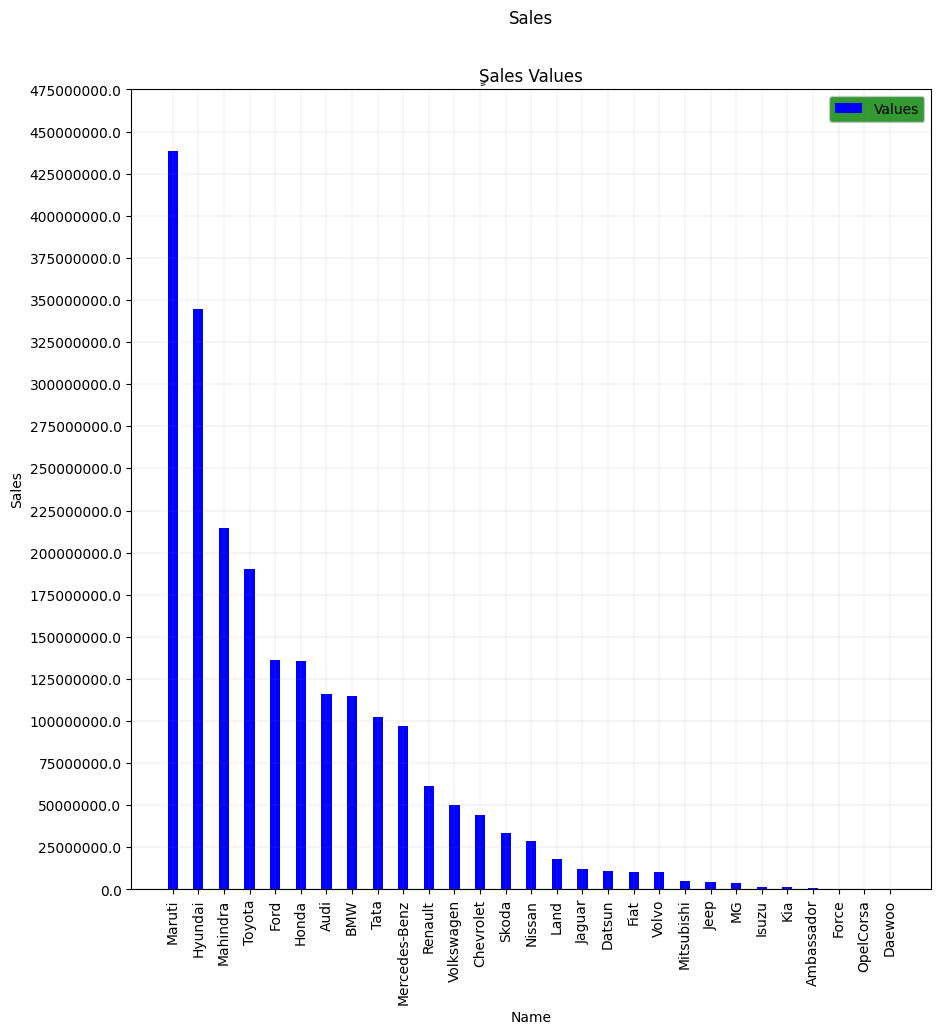

In [41]:
#plot 2:
#the figure has 2 row, 1 columns, and this plot is the second plot.
data = df.groupby(['brand'])['selling_price'].sum().sort_values(ascending=False) 
x = data.index # to extract the brand name
y = data.values #to extract the sum to brand 
plt.bar(x, y, color ='blue',width = 0.4)
plt.rcParams['axes.facecolor'] = '#FFFFFF'
plt.xticks(rotation=90)
plt.xlabel("Name",fontsize=10,color="black")
plt.ylabel("Sales",fontsize=10,color="black")
plt.title("ٍSales Values",color="black")
plt.legend(["Values"], loc ="upper right" ,facecolor='green', labelcolor='black')
plt.rcParams['figure.figsize'] = [10, 10]
plt.grid(color='grey', linestyle='-', linewidth=.1)
#plt.xlim([0, 1]) 
#plt.ylim([0, 2000])
#plt.locator_params(axis='x', nbins=20)
plt.locator_params(axis='y', nbins=20)
#plt.margins(x=0, y=0)
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0])# Show real values,numbers big without it appear short
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9,top=0.9,wspace=0.5, hspace=0.6)# set the spacing between subplots
plt.suptitle("Sales")#Name for the whole graph
plt.show()#view

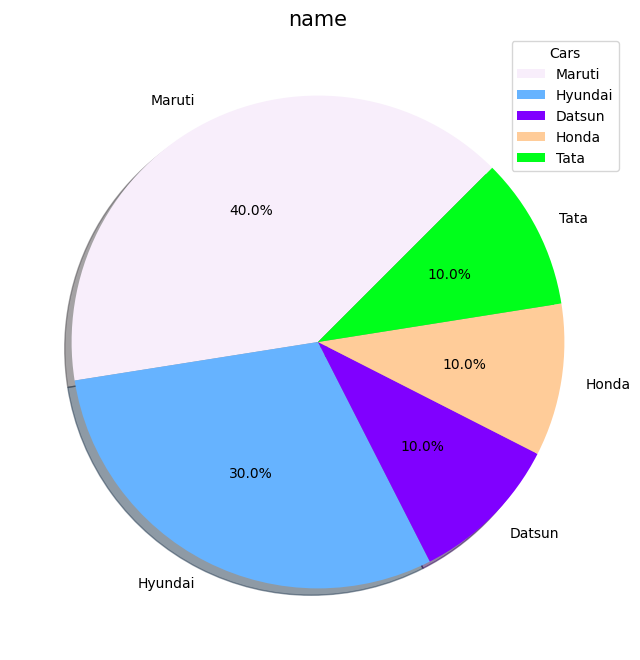

In [42]:
## We will display sales by count in pie graphs
labels = df["brand"][:10].value_counts().index #We chose only twenty
sizes = df["brand"][:10].value_counts() # We chose only twenty
data = df.groupby(['brand'])['brand'].count().sort_values(ascending=False)#to extract the count
x = data.index #to extract the brand name
y = data.values#to extract the count to brand 
colors = ['#F8EEFB','#66b3ff','#8000FF','#ffcc99',"#00FF1B","#FF8040","#F8AEF8"]#color choice
plt.figure(figsize = (8,8))#Determine the size of the graph
# Creating explode data
#explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=45)#Fomat pie
plt.title('name',color = 'black',fontsize = 15)#Fomat title
#plt.legend()#
plt.legend(title = "Cars")#title legend
#plt.legend(wedges, cars, title ="Cars",loc ="center left",bbox_to_anchor =(1, 0, 0.5, 1))
#myexplode = [0.2, 0, 0, 0]
plt.show()#view

# Working on the year column

In [43]:
#To know count value in year coulmn
df.year.value_counts()

2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64

# using seaborn to plot

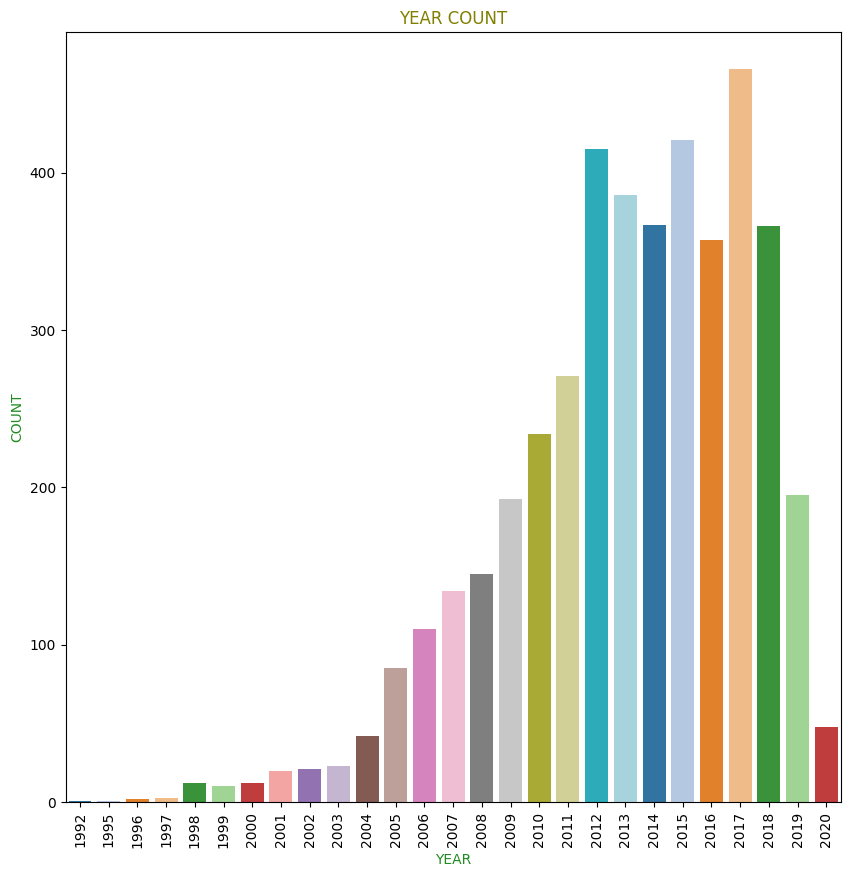

In [44]:
sns.countplot(data=df,x="year",palette="tab20") # https://www.practicalpythonfordatascience.com/ap_seaborn_palette
plt.xticks(rotation=90)
plt.xlabel("YEAR",fontsize=10,color="forestgreen")
plt.ylabel("COUNT",fontsize=10,color="forestgreen")
plt.title("YEAR COUNT",color="olive")
plt.show()

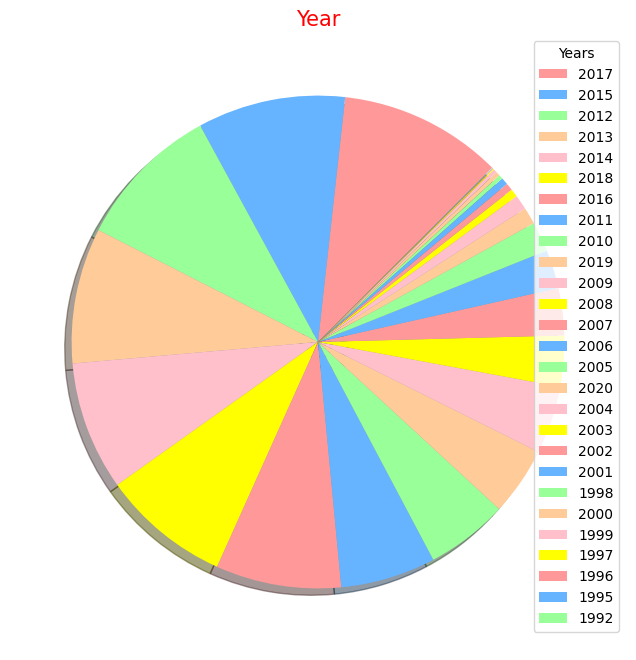

In [45]:
#We will display pie graphs
labels = df["year"].value_counts().index
sizes = df["year"].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"pink","yellow"]
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels , rotatelabels=False, autopct=None,colors=colors,shadow=True, startangle=45, labeldistance=None)
plt.title('Year',color = 'red',fontsize = 15)
plt.legend(title = "Years", loc='upper right')#title legend
plt.show()

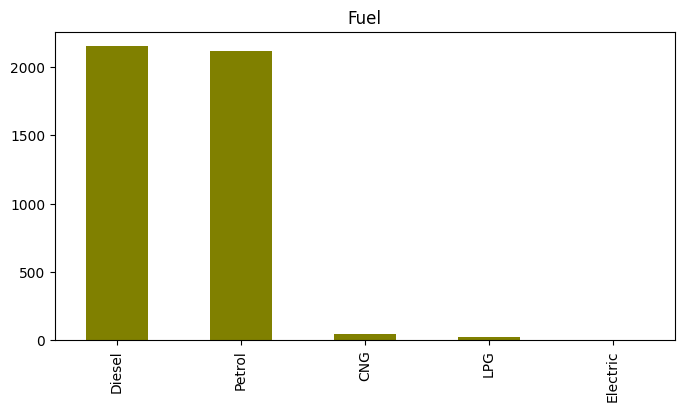

In [46]:
#We will display bar graphs
df["fuel"].value_counts(sort =True).plot(kind="bar", color=["olive"], figsize=(8, 4) , title='Fuel');

<Axes: title={'center': 'Seller type'}>

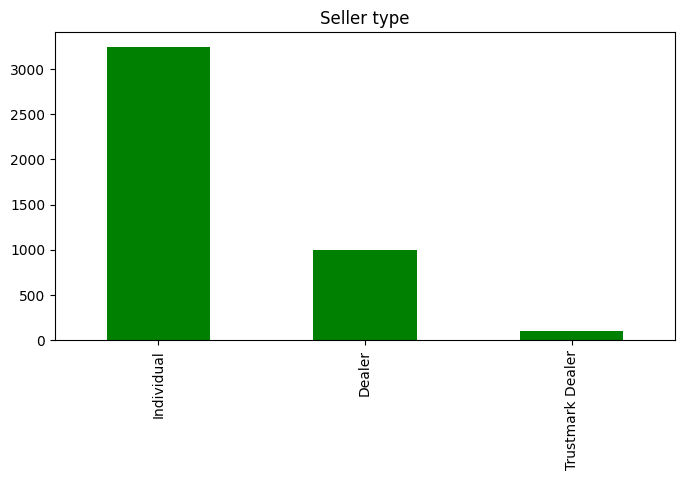

In [47]:
#We will display bar graphs
df["seller_type"].value_counts(sort = True).plot(kind="bar", color=["green"], figsize=(8, 4) , title='Seller type')

<Axes: title={'center': 'Transmission'}>

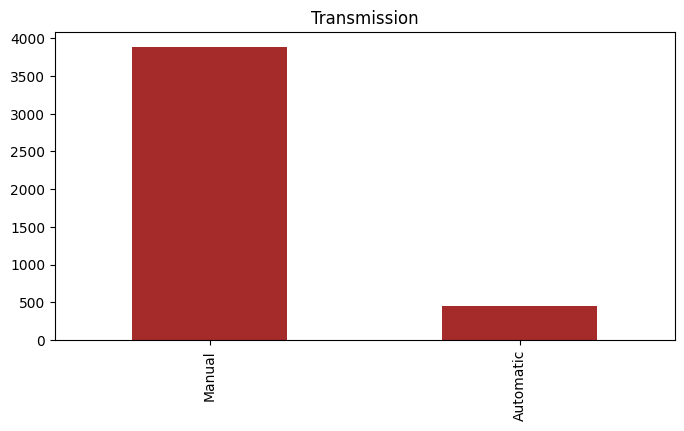

In [48]:
#We will display bar graphs
df["transmission"].value_counts(sort = True).plot(kind="bar", color=["brown"], figsize=(8, 4) , title='Transmission')

<Axes: title={'center': 'Owner'}>

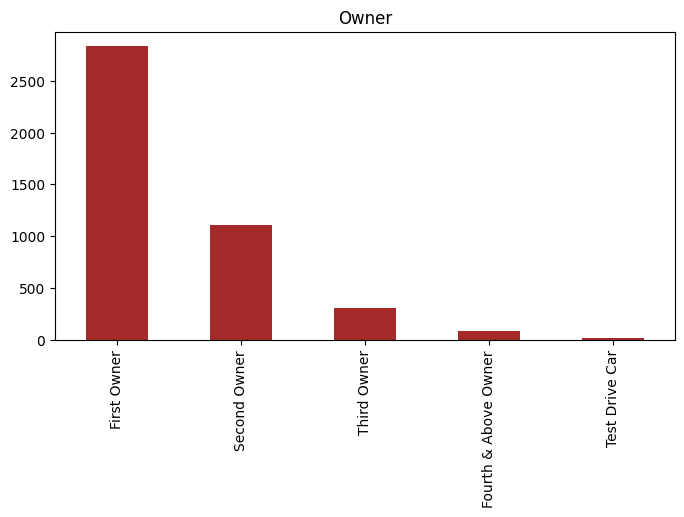

In [49]:
#We will display bar graphs
df["owner"].value_counts(sort = True).plot(kind="bar", color=["brown"], figsize=(8, 4) , title='Owner')

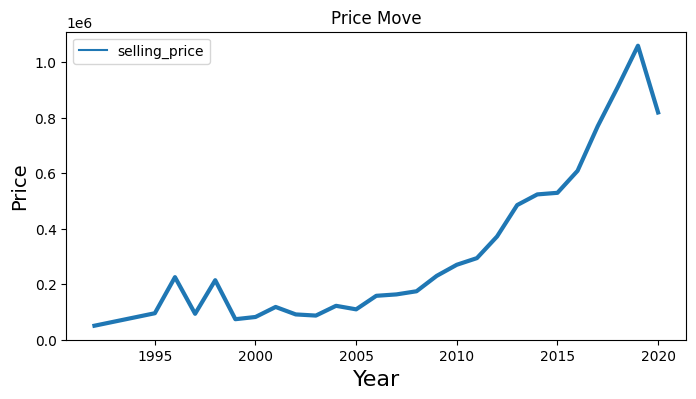

In [50]:
#We will display bar graphs line
def line_plot(data, title ,xlabel, ylabel):
    plt.figure(figsize=(8, 4))
    sns.lineplot(data=data , palette="tab10", linewidth=3.0)
    plt.title(title, fontsize=12)
    plt.ylabel(ylabel, size=14)
    plt.xlabel(xlabel, size=16)
    
df_price_move = df.groupby(['year'])[['selling_price']].mean()
line_plot(df_price_move,'Price Move', 'Year', "Price")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: title={'center': 'Price & km_driven'}, xlabel='km_driven', ylabel='selling_price'>

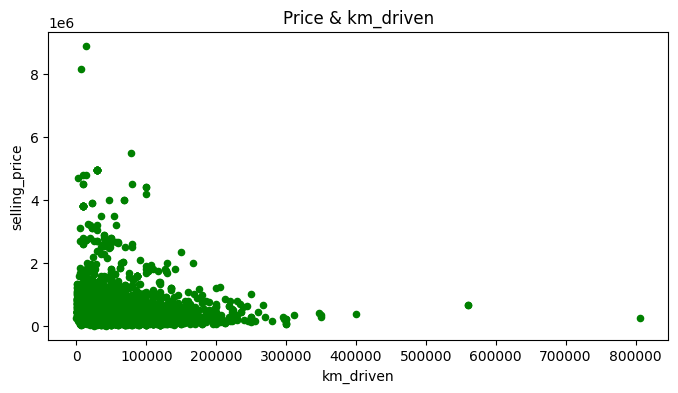

In [51]:
#We will display bar graphs scatter
df.plot(x="km_driven", y="selling_price", kind="scatter", figsize=(8, 4), title="Price & km_driven", color="green")

<Axes: title={'center': 'Price & Year'}, xlabel='year', ylabel='selling_price'>

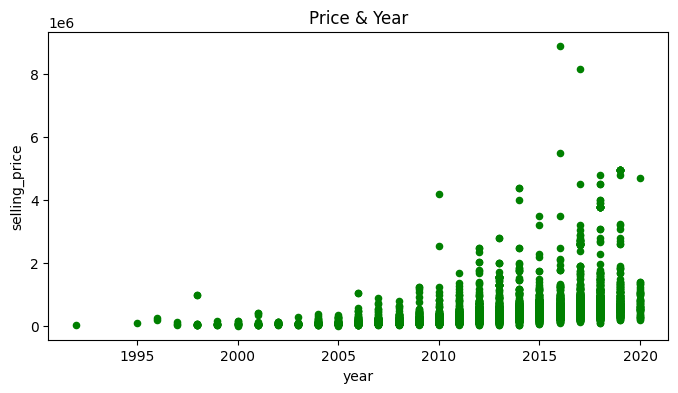

In [52]:
#We will display bar graphs scatter
df.plot(x="year", y="selling_price", kind="scatter", figsize=(8, 4), title="Price & Year", color="green")

In [53]:
# finds the correlation
df.corr()

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


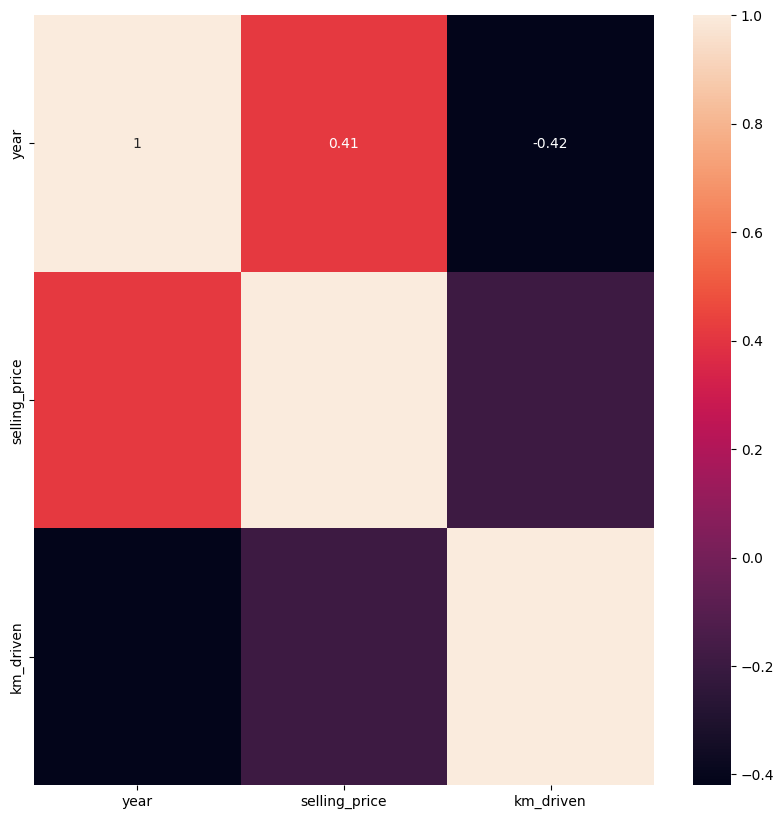

In [54]:
#We will display heatmap
corr = df.corr()
corr = corr['selling_price']
corr = corr.sort_values(ascending=False)
sns.heatmap(df.corr(), annot=True)
plt.show()

In [55]:
# import preprocessing from sklearn
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
# limit to categorical data using df.select_dtypes()
data2 = df.select_dtypes(include=[object])#Extracting non-numeric columns
data2.head(3)

,name,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,Diesel,Individual,Manual,First Owner,Hyundai


In [56]:
#name--owner--brand convert these columns to numbers
le = preprocessing.LabelEncoder()
df['name']= le.fit_transform(df['name'])
df['owner']= le.fit_transform(df['owner'])
df['brand']= le.fit_transform(df['brand'])
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,775,2007,60000,70000,Petrol,Individual,Manual,0,18
1,1041,2007,135000,50000,Petrol,Individual,Manual,0,18
2,505,2012,600000,100000,Diesel,Individual,Manual,0,10
3,118,2017,250000,46000,Petrol,Individual,Manual,0,5
4,279,2014,450000,141000,Diesel,Individual,Manual,2,9


In [57]:
#convert these columns (fuel, seller_type, transmission)
enc = OneHotEncoder(sparse = False)
X4 = df[["fuel", "seller_type", "transmission"]]
X5 = enc.fit_transform(X4)
new_col = enc.get_feature_names_out(["fuel","seller_type","transmission"])
df[new_col] = X5
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,775,2007,60000,70000,Petrol,Individual,Manual,0,18,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1041,2007,135000,50000,Petrol,Individual,Manual,0,18,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,505,2012,600000,100000,Diesel,Individual,Manual,0,10,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,118,2017,250000,46000,Petrol,Individual,Manual,0,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,279,2014,450000,141000,Diesel,Individual,Manual,2,9,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


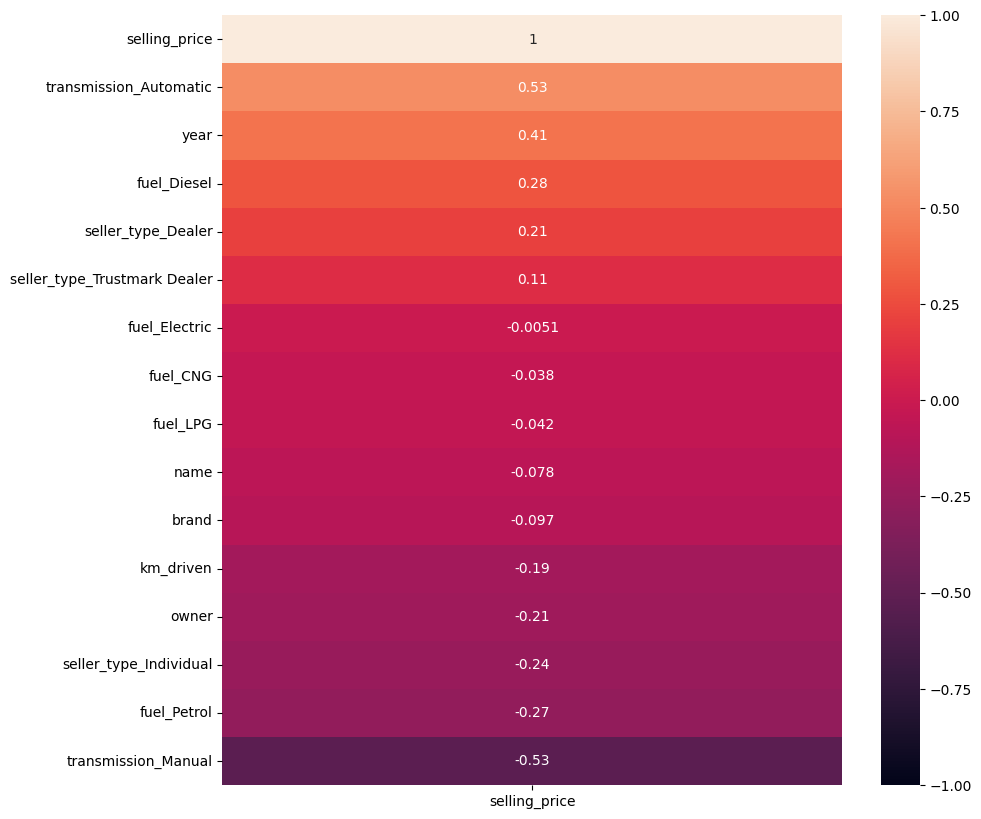

In [58]:
#new heatmap
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr()[["selling_price"]].sort_values("selling_price", ascending = False),vmin = -1, vmax = +1, annot = True, ax = ax)
plt.show()

In [59]:
sta1 = df['selling_price'].mean()
sta2 = df['selling_price'].count()
sta3 = df['selling_price'].std()
sta4 = df['selling_price'].min()
sta5 = df['selling_price'].quantile(q=0.25)
sta6 = df['selling_price'].quantile(q=0.50)
sta7 = df['selling_price'].quantile(q=0.75)
sta8 = df['selling_price'].max()
sta9 = df['selling_price'].median()